# Spam Email Classification

This project explores classifying spam email using machine learning techniques.

This project utilizes the Spambase dataset from the UCI Machine Learning Repository, which contains features extracted from emails and a binary label indicating whether each email is spam or not.

The goal is to build and evaluate several classification models, including Gaussian Naive Bayes, Logistic Regression, and Random Forest, to predict whether an email is spam.

This project will assess the performance of these models using metrics such as accuracy, F1-score, and Area Under the ROC Curve (AUC).

Furthermore, it will employ hyperparameter tuning and cross-validation to optimize model performance and ensure robustness.

Finally, it will analyze the results, compare the models, discuss the implications of the findings, and identify potential limitations of the analysis.

In [ ]:
# pip install ucimlrepo

1. Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve,
)

1. fetching the dataset and creating the Data Frames.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets


y = y.values.ravel()  # Convert y to a 1D array

2. Exploratory Data Analysis (EDA)

In [ ]:
# 2. Exploratory Data Analysis (EDA)

print(f"Number of rows: {X.shape[0]}")
print(f"Number of columns: {X.shape[1]}")
print()


# --- Descriptive Statistics ---
print(X.describe())

Number of rows: 4601
Number of columns: 57

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441          

3. Data Preprocessing

In [ ]:
# Check for missing values
print(X.isnull().sum().any()) # False means no missing values
print(pd.DataFrame(y).isnull().sum().any()) # False means no missing values

False
False


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

4. Spliting Data into Training and Testing Sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # 80/20 split

___________________________________________________________________________________________________


5. Model Selection and Training


5.1 Naive Bayes model

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

5.1.1 Model Evaluation for Naive Bayes model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy}", "%")
print("_" * 60)
print()
print(classification_report(y_test, y_pred)) # Shows precision, recall, F1-score
print(confusion_matrix(y_test, y_pred))      # Helps visualize model performance

Accuracy: 82.19326818675353 %
____________________________________________________________

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       531
           1       0.72      0.94      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

[[391 140]
 [ 24 366]]


Confusion Matrix:

<Figure size 500x500 with 0 Axes>

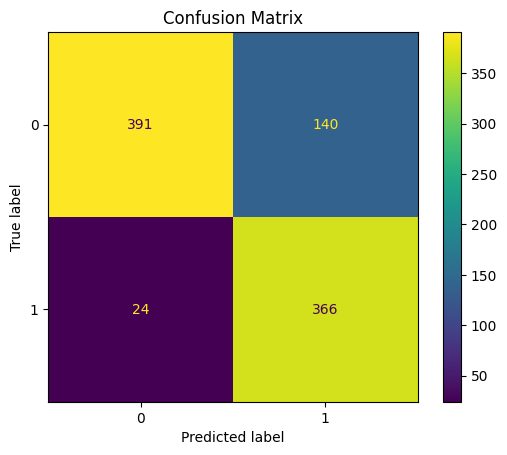

In [ ]:
# 1. Confusion Matrix:
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

5.1.2 Hyperparameter Tuning for Naive Bayes model


In [ ]:

# 7. Hyperparameter Tuning (Optional but Recommended - Example with GridSearchCV)

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)} # Example for GaussianNB

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("Tuned Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned)}")
print("_" * 60)
print()
print(classification_report(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred))      # Helps visualize model performance

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Model:
Accuracy: 0.8219326818675353
____________________________________________________________

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       531
           1       0.72      0.94      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

[[391 140]
 [ 24 366]]


Confusion Matrix:

<Figure size 500x500 with 0 Axes>

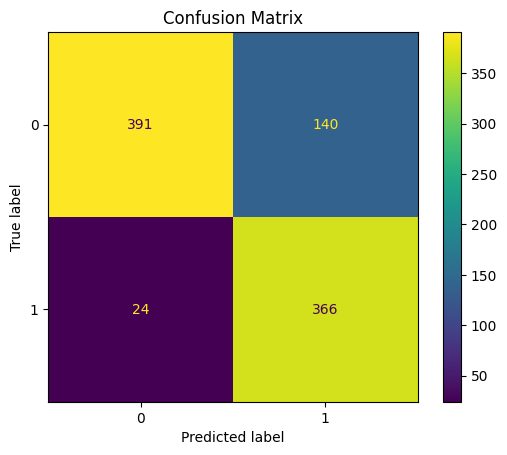

In [ ]:
# 1. Confusion Matrix:
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tuned), display_labels=model.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

ROC Curve and AUC:

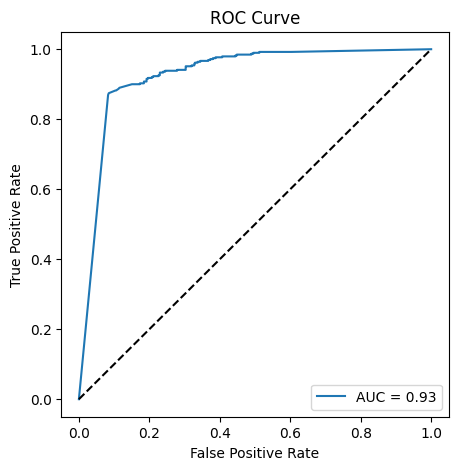

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Prob. of positive class (class 1)

plt.figure(figsize=(5, 5))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Precision-Recall Curve:

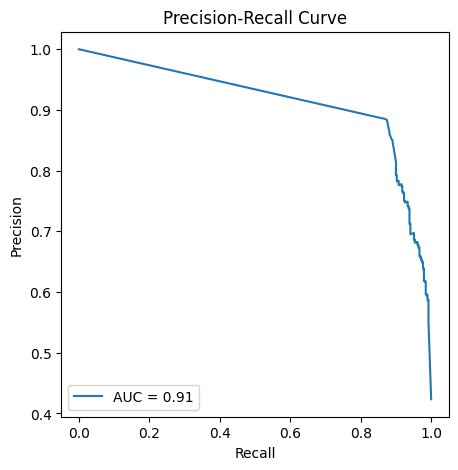

In [ ]:
plt.figure(figsize=(5, 5))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)  # Area under the curve
plt.plot(recall, precision, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

5.1.3 Cross-Validation for Naive Bayes model


In [ ]:
# 8. Cross-Validation (Important for Robust Evaluation)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")


Cross-validation scores: [0.85124864 0.86630435 0.85434783 0.84347826 0.69565217]
Mean cross-validation accuracy: 0.8222062502950479


___________________________________________________________________________________________________

5.2. Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

5.2.1 Model Evaluation for Logistic Regression

In [ ]:
lr_y_pred = lr_model.predict(X_test)

In [ ]:

# Evaluation metrics
accuracy = accuracy_score(y_test, lr_y_pred) * 100
print(f"Accuracy: {accuracy}", "%")
print("_" * 60)
print()
print(classification_report(y_test, lr_y_pred)) # Shows precision, recall, F1-score
print(confusion_matrix(y_test, lr_y_pred))

Accuracy: 91.96525515743757 %
____________________________________________________________

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921

[[506  25]
 [ 49 341]]


Confusion Matrix:

<Figure size 500x500 with 0 Axes>

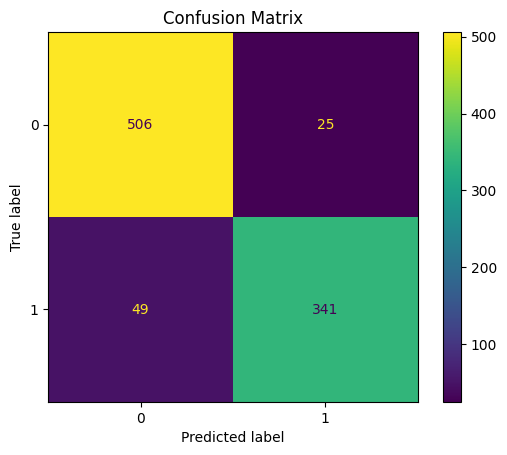

In [ ]:
# 1. Confusion Matrix:
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_y_pred), display_labels=lr_model.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

5.2.2 Hyperparameter Tuning for Logistic Regression

In [ ]:
# 5.2.2 Hyperparameter Tuning for Logistic Regression
param_grid_lr = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga'] # Solvers that support both penalties
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                              param_grid_lr, cv=5, verbose=1, n_jobs=-1, scoring='f1') # Use F1-score
grid_search_lr.fit(X_train, y_train)

best_lr_model = grid_search_lr.best_estimator_
lr_y_pred_tuned = best_lr_model.predict(X_test)

print("\nLogistic Regression (Tuned):")
accuracy_tuned = accuracy_score(y_test, lr_y_pred_tuned) * 100
print(f"Tuned Accuracy: {accuracy_tuned:.2f}%")

print("_" * 60)
print()
print(classification_report(y_test, lr_y_pred_tuned))
print("Best Hyperparameters:", grid_search_lr.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits

Logistic Regression (Tuned):
Tuned Accuracy: 91.86%
____________________________________________________________

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.92      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921

Best Hyperparameters: {'C': 21.54434690031882, 'penalty': 'l2', 'solver': 'liblinear'}


Confusion Matrix:

<Figure size 500x500 with 0 Axes>

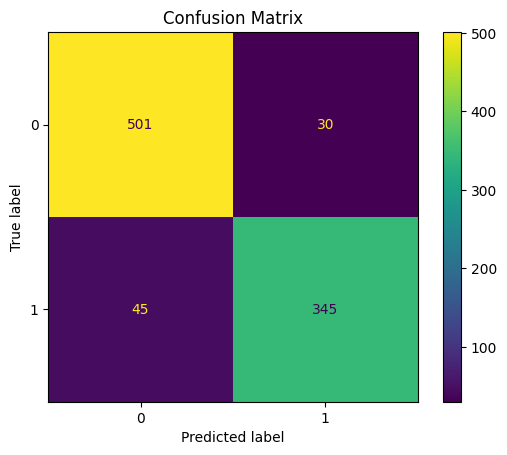

In [ ]:
# 1. Confusion Matrix:
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_y_pred_tuned), display_labels=lr_model.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

ROC Curve and AUC:

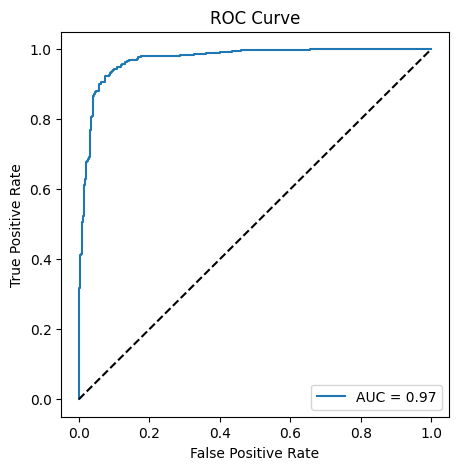

In [ ]:
lr_y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Prob. of positive class (class 1)

plt.figure(figsize=(5, 5))
fpr, tpr, _ = roc_curve(y_test, lr_y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Precision-Recall Curve:

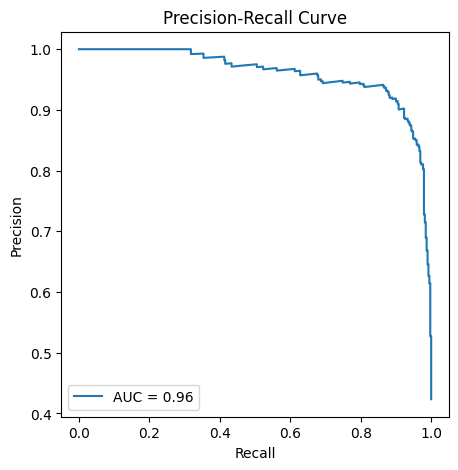

In [ ]:
plt.figure(figsize=(5, 5))
precision, recall, _ = precision_recall_curve(y_test, lr_y_pred_proba)
pr_auc = auc(recall, precision)  # Area under the curve
plt.plot(recall, precision, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

5.2.3 Cross-Validation for Logistic Regression

In [ ]:
cv_scores_lr = cross_val_score(best_lr_model, X_scaled, y, cv=5, scoring='f1') # Use F1-score
print(f"\nLogistic Regression Cross-validation scores (Tuned): {cv_scores_lr}")
print(f"Mean cross-validation F1 (Tuned): {cv_scores_lr.mean():.4f}")  # Format mean F1


Logistic Regression Cross-validation scores (Tuned): [0.89428571 0.90807799 0.91428571 0.93049645 0.79314888]
Mean cross-validation F1 (Tuned): 0.8881


___________________________________________________________________________________________________


5.3. Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

5.3.1 Feature Importances:

In [ ]:
# 1. Getting Feature Importances:
feature_importances = rf_model.feature_importances_

# 2. Sorting Feature Importances
sorted_indices = feature_importances.argsort()[::-1]  # Descending order

# Keep top 10 features
n_features_to_keep = 10
top_feature_indices = sorted_indices[:n_features_to_keep]
X_train_selected = X_train[:, top_feature_indices]
X_test_selected = X_test[:, top_feature_indices]


5.3.2  Model Evaluation for Random Forest

In [ ]:
rf_model.fit(X_train_selected, y_train)
rf_y_pred = rf_model.predict(X_test_selected)

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, rf_y_pred) * 100
print(f"Accuracy: {accuracy}", "%")
print("_" * 60)
print()
print(classification_report(y_test, rf_y_pred)) # Shows precision, recall, F1-score


Accuracy: 93.70249728555918 %
____________________________________________________________

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.95      0.90      0.92       390

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



Confusion Matrix:


<Figure size 500x500 with 0 Axes>

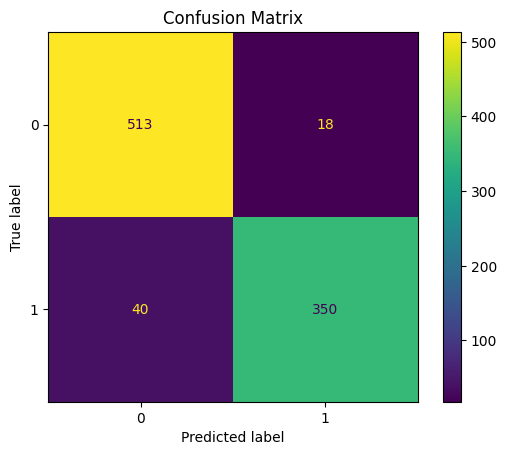

In [ ]:
# 1. Confusion Matrix:
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_y_pred), display_labels=rf_model.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

5.3.3 Hyperparameter Tuning for Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],  # Include None for no max depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, verbose=1, n_jobs=-1, scoring='f1') # Use F1 score for tuning, especially if imbalanced
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
rf_y_pred_tuned = best_rf_model.predict(X_test)

print("\nTuned Random Forest:")

accuracy_tuned = accuracy_score(y_test, rf_y_pred_tuned) * 100

print(f"Tuned Accuracy: {accuracy_tuned:.2f}%")
print("_" * 60)
print()
print(classification_report(y_test, rf_y_pred_tuned))


print("Best Hyperparameters:", grid_search_rf.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Tuned Random Forest:
Tuned Accuracy: 95.87%
____________________________________________________________

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Confusion Matrix:

<Figure size 500x500 with 0 Axes>

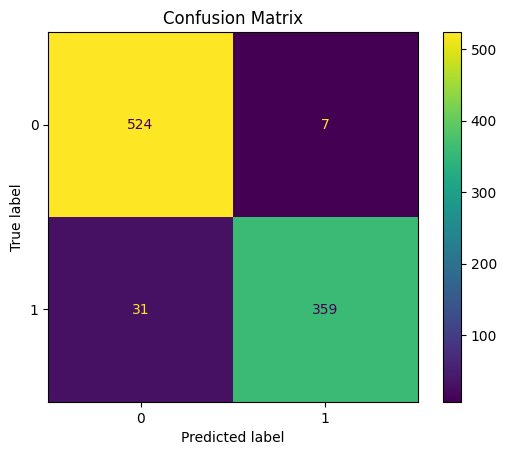

In [ ]:
# 1. Confusion Matrix:
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_y_pred_tuned), display_labels=rf_model.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

ROC Curve and AUC:

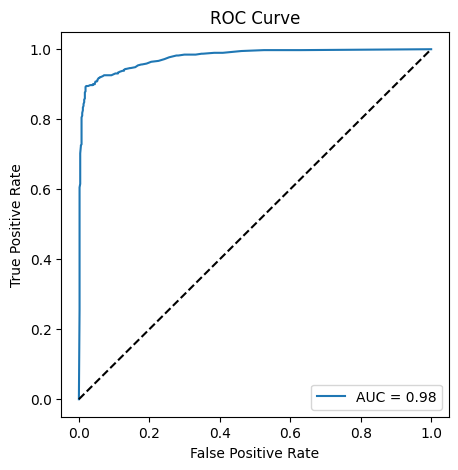

In [ ]:
rf_y_pred_proba = rf_model.predict_proba(X_test_selected)[:, 1]  # Prob. of positive class (class 1)

plt.figure(figsize=(5, 5))
fpr, tpr, _ = roc_curve(y_test, rf_y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Precision-Recall Curve:

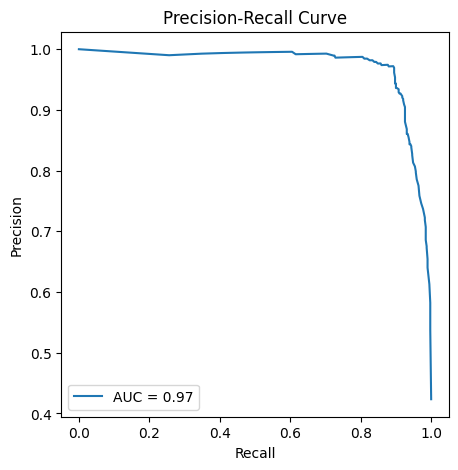

In [ ]:
plt.figure(figsize=(5, 5))
precision, recall, _ = precision_recall_curve(y_test, rf_y_pred_proba)
pr_auc = auc(recall, precision)  # Area under the curve
plt.plot(recall, precision, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

5.3.4 Cross-Validation for Random Forest

In [ ]:
cv_scores_rf = cross_val_score(best_rf_model, X_scaled, y, cv=5, scoring='f1') # Use F1 score for CV as well
print(f"\nRandom Forest Cross-validation scores: {cv_scores_rf}")
print(f"Mean cross-validation F1: {cv_scores_rf.mean()}")


Random Forest Cross-validation scores: [0.93370945 0.92528736 0.94444444 0.96638655 0.79490446]
Mean cross-validation F1: 0.9129464527832672


___________________________________________________________________________________________________


# Summary of the findings

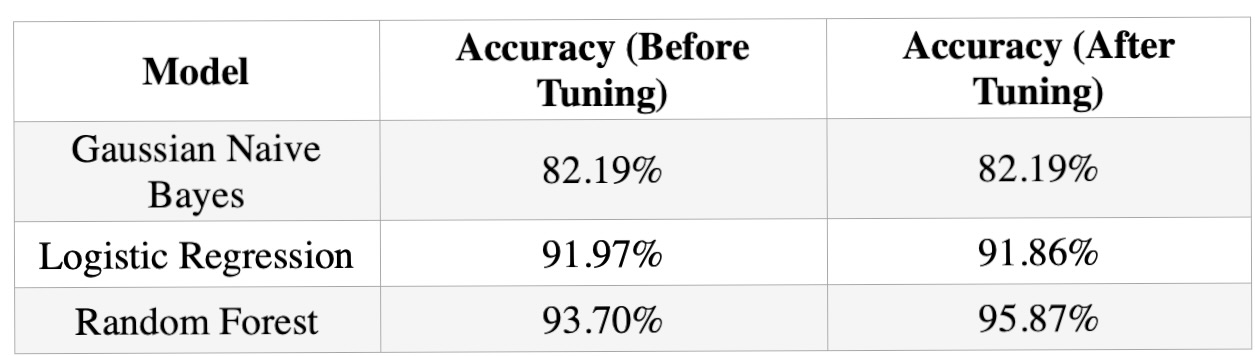

Key Observations:


* Random Forest consistently outperformed both Gaussian Naive Bayes and Logistic Regression, both before and after tuning. This is likely due to its ability to handle non-linear relationships and high dimensionality more effectively.

* Hyperparameter tuning made a noticeable difference for the Random Forest model, while the effect was minimal for the other models. This highlights the importance of tuning, especially for complex models with many tunable parameters.

* The slight decrease in Logistic Regression accuracy after tuning could be due to random variation, emphasizing the need for robust evaluation methods such as cross-validation. The tuned model may generalize slightly better.



Limitations:

This analysis is subject to several limitations.

The Spambase dataset, while a valuable resource, may not fully represent the complexity and evolving nature of modern spam. Its age and potential biases in data collection could affect the generalizability of our models.

Furthermore, While Random Forest, a relatively complex model, was used, other algorithms like Gradient Boosting or Neural Networks might offer higher accuracy, though at the cost of increased computational resources and reduced interpretability.
